In [1]:
# Agenda
# Compute portfolio simple retrun 
# Daily return 
# Volatility, etc.


In [3]:
!pip install pandas

     |████████████████████████████████| 10.6 MB 4.9 MB/s eta 0:00:01
     |████████████████████████████████| 510 kB 5.5 MB/s eta 0:00:01


In [5]:
!pip install pandas_datareader

     |████████████████████████████████| 107 kB 790 kB/s eta 0:00:01
     |████████████████████████████████| 4.5 MB 2.9 MB/s eta 0:00:01


In [7]:
!pip install matplotlib

     |████████████████████████████████| 11.4 MB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 7.0 MB/s eta 0:00:01
     |████████████████████████████████| 60 kB 4.6 MB/s eta 0:00:01


In [1]:
# importing libraries
from datetime import datetime
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# Getting Stock symbols 
stock_symbols = ['MS', 'WFC', 'C', 'BAC', 'JPM', 'AAL', 'AAPL', 'NVDA']

In [3]:
# Starting date
startdate = '2010-01-01'

# end date - todays date in format YYYY-MM-DD
today = datetime.today().strftime('%Y-%m-%d')
today

'2020-08-13'

In [4]:
# number of assests in the portfolio
numAssets = len(stock_symbols)

print("My portfolio has " +str(numAssets)+ " Assests from Finance, Aviation and Technology Industry ")

My portfolio has 8 Assests from Finance, Aviation and Technology Industry 


In [5]:
# function to get stock Adjusted closing price price 
def getMyPortfolio(stocks = stock_symbols, start = startdate, end = today, col = 'Adj Close'):
    data = web.DataReader(stocks, data_source = 'yahoo' ,start = start, end = end)[col]
    return data

In [6]:
my_stocks = getMyPortfolio(stock_symbols)
my_stocks

Symbols,MS,WFC,C,BAC,JPM,AAL,AAPL,NVDA
Date,,,,,,,,
2010-01-04,25.759523,20.318752,30.533976,13.913157,32.623146,4.496876,26.419203,17.010056
2010-01-05,26.701244,20.876556,31.701447,14.365398,33.255066,5.005957,26.464878,17.258446
2010-01-06,27.042919,20.906300,32.689320,14.533883,33.437775,4.798555,26.043921,17.368835
2010-01-07,27.434603,21.664902,32.779129,15.012730,34.100143,4.939965,25.995777,17.028448
2010-01-08,26.876251,21.464094,32.240284,14.879715,34.016392,4.845690,26.168606,17.065248
...,...,...,...,...,...,...,...,...
2020-08-07,50.349998,25.070000,52.119999,26.110001,99.379997,13.030000,444.450012,447.980011
2020-08-10,50.580002,24.700001,52.860001,26.559999,100.639999,14.000000,450.910004,446.600006
2020-08-11,51.779999,25.320000,53.759998,26.920000,103.820000,13.730000,437.500000,434.000000


In [7]:
my_stocks.head(3)

Symbols,MS,WFC,C,BAC,JPM,AAL,AAPL,NVDA
Date,,,,,,,,
2010-01-04,25.759523,20.318752,30.533976,13.913157,32.623146,4.496876,26.419203,17.010056
2010-01-05,26.701244,20.876556,31.701447,14.365398,33.255066,5.005957,26.464878,17.258446
2010-01-06,27.042919,20.906300,32.689320,14.533883,33.437775,4.798555,26.043921,17.368835


In [8]:
my_stocks.shape

(2672, 8)

In [9]:
# function to visualize the portfolio 
def portfolio_graph(stocks = stock_symbols, start = startdate, end = today, col = 'Adj Close'):
    
    title = 'Portfolio '+col+' Price History'
    
    my_stocks = getMyPortfolio(stocks = stocks, start = start, end = end, col = col)
    
    plt.figure(figsize = (12.2, 4.5))
    
    #Looping through each stock and ploting the price
    for i in my_stocks.columns.values:
        plt.plot(my_stocks[i], label = i)
        
    plt.title(title)
    plt.xlabel('Date', fontsize =18)
    plt.ylabel(col+' Price USD ($)', fontsize =18)
    plt.legend(my_stocks.columns.values, loc = 'upper left')
    plt.show()

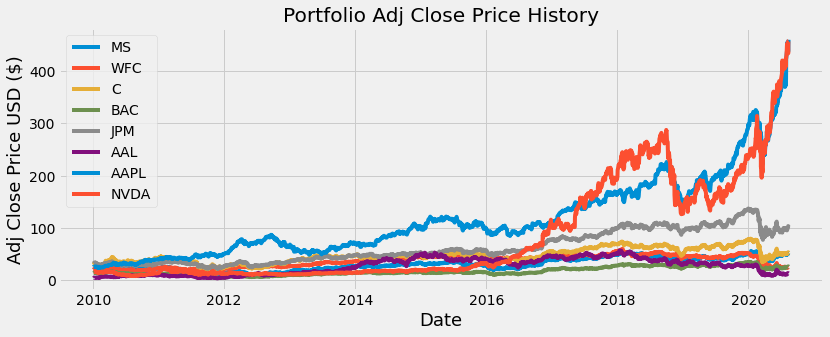

In [10]:
# ploting the portfolio
portfolio_graph(stock_symbols)

In [11]:
# Calculating simple return
daily_simple_return = my_stocks.pct_change(1)

daily_simple_return

Symbols,MS,WFC,C,BAC,JPM,AAL,AAPL,NVDA
Date,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.036558,0.027453,0.038235,0.032505,0.019370,0.113208,0.001729,0.014603
2010-01-06,0.012796,0.001425,0.031162,0.011729,0.005494,-0.041431,-0.015906,0.006396
2010-01-07,0.014484,0.036286,0.002747,0.032947,0.019809,0.029469,-0.001849,-0.019598
2010-01-08,-0.020352,-0.009269,-0.016439,-0.008860,-0.002456,-0.019084,0.006648,0.002161
...,...,...,...,...,...,...,...,...
2020-08-07,0.018200,0.034241,0.024170,0.025128,0.022007,-0.000767,-0.022736,-0.011998
2020-08-10,0.004568,-0.014759,0.014198,0.017235,0.012679,0.074444,0.014535,-0.003081
2020-08-11,0.023725,0.025101,0.017026,0.013554,0.031598,-0.019286,-0.029740,-0.028213


In [12]:
# stock correlation
daily_simple_return.corr()

Symbols,MS,WFC,C,BAC,JPM,AAL,AAPL,NVDA
Symbols,,,,,,,,
MS,1.000000,0.751049,0.822673,0.817767,0.834307,0.444372,0.429734,0.453213
WFC,0.751049,1.000000,0.794010,0.792382,0.825265,0.455028,0.420789,0.387132
C,0.822673,0.794010,1.000000,0.854953,0.862167,0.469965,0.436681,0.431756
BAC,0.817767,0.792382,0.854953,1.000000,0.857827,0.449820,0.425548,0.418119
JPM,0.834307,0.825265,0.862167,0.857827,1.000000,0.452221,0.436814,0.418830
AAL,0.444372,0.455028,0.469965,0.449820,0.452221,1.000000,0.283592,0.272378
AAPL,0.429734,0.420789,0.436681,0.425548,0.436814,0.283592,1.000000,0.452514
NVDA,0.453213,0.387132,0.431756,0.418119,0.418830,0.272378,0.452514,1.000000


In [13]:
# covariance matrix
daily_simple_return.cov()

Symbols,MS,WFC,C,BAC,JPM,AAL,AAPL,NVDA
Symbols,,,,,,,,
MS,0.000515,0.000312,0.000420,0.000416,0.000343,0.000337,0.000171,0.000274
WFC,0.000312,0.000334,0.000327,0.000325,0.000273,0.000278,0.000135,0.000189
C,0.000420,0.000327,0.000506,0.000432,0.000351,0.000353,0.000172,0.000259
BAC,0.000416,0.000325,0.000432,0.000503,0.000348,0.000337,0.000167,0.000250
JPM,0.000343,0.000273,0.000351,0.000348,0.000328,0.000273,0.000139,0.000202
AAL,0.000337,0.000278,0.000353,0.000337,0.000273,0.001115,0.000166,0.000243
AAPL,0.000171,0.000135,0.000172,0.000167,0.000139,0.000166,0.000307,0.000212
NVDA,0.000274,0.000189,0.000259,0.000250,0.000202,0.000243,0.000212,0.000712


In [14]:
# variance
daily_simple_return.var()

Symbols
MS      0.000515
WFC     0.000334
C       0.000506
BAC     0.000503
JPM     0.000328
AAL     0.001115
AAPL    0.000307
NVDA    0.000712
dtype: float64

In [15]:
# standard deviations
# higher the volatility higer return
print('The stock Valatility:') 
daily_simple_return.std()

The stock Valatility:


Symbols
MS      0.022689
WFC     0.018284
C       0.022505
BAC     0.022429
JPM     0.018099
AAL     0.033394
AAPL    0.017535
NVDA    0.026677
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

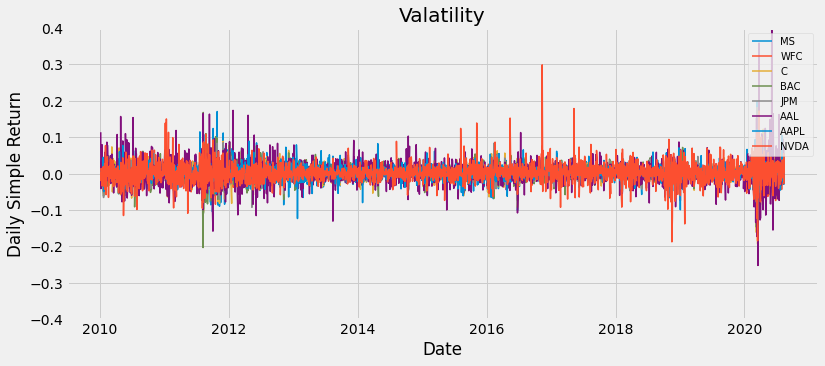

In [16]:
# visualize stock daily return 
plt.figure(figsize = (12, 5))

# LOOP through each stock and plot the simple return
for i in daily_simple_return.columns.values:
    plt.plot(daily_simple_return.index, daily_simple_return[i], lw = 1.5, label = i)
    
plt.legend(loc = 'upper right', fontsize = 10)
plt.title('Valatility')
plt.xlabel('Date')
plt.ylabel('Daily Simple Return')
plt.ylim(ymax = 0.4, ymin = -0.4)
plt.show

In [17]:
# Mean for daily return
daily_mean = daily_simple_return.mean()

print('The Daily Mean of Simple Returns: ')
print(daily_mean)

The Daily Mean of Simple Returns: 
Symbols
MS      0.000521
WFC     0.000246
C       0.000460
BAC     0.000491
JPM     0.000592
AAL     0.000953
AAPL    0.001224
NVDA    0.001586
dtype: float64


In [18]:
# Calculating the portfolios expected return
randomWeight = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

portfolioReturn = np.sum(daily_mean * randomWeight)

print('Expected Daily Portfolio return (%): ' +str(portfolioReturn*100)+ '%')

Expected Daily Portfolio return (%): 0.060737011553865565%


In [19]:
# Calculating Annual Expected return
print('Expected Annual Portfolio Return: ' +str(portfolioReturn*100*252)+ '%')

Expected Annual Portfolio Return: 15.305726911574123%


In [20]:
# Calculating the Portfolio SD

In [21]:
# Calculating the growth of the investment (cumulative return)
dailyCumlSimpleReturn = (daily_simple_return +1).cumprod()

dailyCumlSimpleReturn

Symbols,MS,WFC,C,BAC,JPM,AAL,AAPL,NVDA
Date,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,1.036558,1.027453,1.038235,1.032505,1.019370,1.113208,1.001729,1.014603
2010-01-06,1.049822,1.028917,1.070588,1.044614,1.024971,1.067086,0.985795,1.021092
2010-01-07,1.065028,1.066252,1.073530,1.079031,1.045275,1.098533,0.983973,1.001081
2010-01-08,1.043352,1.056369,1.055882,1.069471,1.042707,1.077568,0.990515,1.003245
...,...,...,...,...,...,...,...,...
2020-08-07,1.954617,1.233836,1.706951,1.876641,3.046303,2.897567,16.822991,26.336187
2020-08-10,1.963546,1.215626,1.731186,1.908984,3.084926,3.113272,17.067510,26.255059
2020-08-11,2.010130,1.246139,1.760662,1.934859,3.182403,3.053230,16.559924,25.514320


<function matplotlib.pyplot.show(close=None, block=None)>

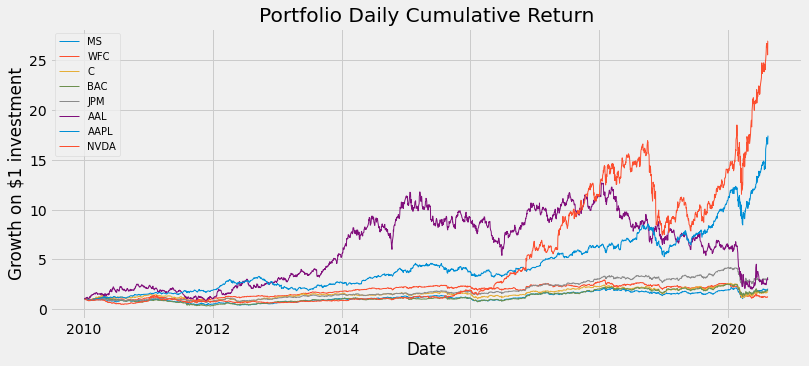

In [22]:
#Visualize the daily cumulative simple return

plt.figure(figsize = (12,5))
for i in dailyCumlSimpleReturn.columns.values:
    plt.plot(dailyCumlSimpleReturn.index, dailyCumlSimpleReturn[i], lw = 1, label = i)
    
plt.xlabel('Date')
plt.ylabel("Growth on $1 investment")
plt.title('Portfolio Daily Cumulative Return')
plt.legend(loc = 'upper left', fontsize = 10)
plt.show

In [23]:
# Optimize Portfolio using Efficiency Frontier

In [26]:
my_stocks.head()

Symbols,MS,WFC,C,BAC,JPM,AAL,AAPL,NVDA
Date,,,,,,,,
2010-01-04,25.759523,20.318752,30.533976,13.913157,32.623146,4.496876,26.419203,17.010056
2010-01-05,26.701244,20.876556,31.701447,14.365398,33.255066,5.005957,26.464878,17.258446
2010-01-06,27.042919,20.906300,32.689320,14.533883,33.437775,4.798555,26.043921,17.368835
2010-01-07,27.434603,21.664902,32.779129,15.012730,34.100143,4.939965,25.995777,17.028448
2010-01-08,26.876251,21.464094,32.240284,14.879715,34.016392,4.845690,26.168606,17.065248


In [28]:
df = pd.DataFrame(my_stocks)

In [32]:
# creating Annual Covariance matrix

cov_annual = daily_simple_return.cov() *252
cov_annual

Symbols,MS,WFC,C,BAC,JPM,AAL,AAPL,NVDA
Symbols,,,,,,,,
MS,0.129729,0.078516,0.105856,0.104872,0.086337,0.084846,0.043085,0.069129
WFC,0.078516,0.084245,0.082332,0.081888,0.068821,0.070013,0.033997,0.047585
C,0.105856,0.082332,0.127628,0.108749,0.088495,0.089003,0.043425,0.065321
BAC,0.104872,0.081888,0.108749,0.126772,0.087754,0.084902,0.042176,0.063046
JPM,0.086337,0.068821,0.088495,0.087754,0.082548,0.068877,0.034935,0.050960
AAL,0.084846,0.070013,0.089003,0.084902,0.068877,0.281021,0.041847,0.061148
AAPL,0.043085,0.033997,0.043425,0.042176,0.034935,0.041847,0.077484,0.053343
NVDA,0.069129,0.047585,0.065321,0.063046,0.050960,0.061148,0.053343,0.179343


In [34]:
# Calculating portfolio variance
port_var = np.dot(randomWeight.T,np.dot( cov_annual, randomWeight))
port_var

0.0497129104456291

In [35]:
# calculating portfolio volatility (standard deviations )
port_volatility = np.sqrt(port_var)
port_volatility

0.2229639218475247

In [41]:
# Calculating simple annual retrun
port_annual_return = np.sum(daily_simple_return.mean()*randomWeight)*252
print('Annual mean return of the portfolio: '+str(port_annual_return*100)+' %')

Annual mean return of the portfolio: 15.305726911574121 %


In [48]:
# Calculating annual expected return, variance and volatility

perc_var = str(round(port_var, 4) *100) + '%'
perc_vol = str(round(port_volatility,4) *100) + '%'
perc_ret = str(round(port_annual_return, 6) *100) +'%'

print('Portfolio Specs')
print('Expected Annual Return: '+perc_ret)
print('Expected Annual Variance: '+ perc_var)
print('Expected Annual Volatility / Risk: '+perc_vol)

Portfolio Specs
Expected Annual Return: 15.3057%
Expected Annual Variance: 4.97%
Expected Annual Volatility / Risk: 22.3%


In [1]:
# Installing portfolio optimization package
!pip install PyPortfolioOpt

  Using cached PyPortfolioOpt-1.2.4-py3-none-any.whl (48 kB)
  Using cached cvxpy-1.0.31.tar.gz (947 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached ecos-2.0.7.post1.tar.gz (126 kB)
  Using cached osqp-0.6.1-cp38-cp38-macosx_10_9_x86_64.whl (158 kB)
Processing /Users/aarjavjain/Library/Caches/pip/wheels/f4/c7/82/0bcdc3506e6a8365963db24f477b81693438d4b9165c0757b7/multiprocess-0.70.10-py3-none-any.whl
  Using cached scs-2.1.2.tar.gz (3.5 MB)
Processing /Users/aarjavjain/Library/Caches/pip/wheels/93/7f/7d/78ec535a4340ef2696aad8b17fe8bb063d56301bd62881b069/dill-0.3.2-py3-none-any.whl
  ERROR: Command errored out with exit status 1:
   command: /opt/miniconda3/bin/python /opt/miniconda3/lib/python3.8/site-packages/pip/_vendor/pep517/_in_process.py build_wheel /var/folders/0d/r4345qmx5xl_rkcvw7v9yk6w0000gn/T/tmpealzrxg2
       cwd: /private/var/folders/0d/r4345qmx5xl_rkcvw7v9yk6w0000gn/T/pip-inst

  ERROR: Command errored out with exit status 1:
   command: /opt/miniconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/0d/r4345qmx5xl_rkcvw7v9yk6w0000gn/T/pip-install-mr_9v8z2/ecos/setup.py'"'"'; __file__='"'"'/private/var/folders/0d/r4345qmx5xl_rkcvw7v9yk6w0000gn/T/pip-install-mr_9v8z2/ecos/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/0d/r4345qmx5xl_rkcvw7v9yk6w0000gn/T/pip-wheel-zgk__2hs
       cwd: /private/var/folders/0d/r4345qmx5xl_rkcvw7v9yk6w0000gn/T/pip-install-mr_9v8z2/ecos/
  Complete output (24 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib.macosx-10.9-x86_64-3.8
  creating build/lib.macosx-10.9-x86_64-3.8/ecos
  copying src/ecos/version.py -> build/lib.macosx-10.9-x86_64-3.8/ecos
  copying src/ecos/__init__

Failed to build cvxpy ecos scs
ERROR: Could not build wheels for cvxpy which use PEP 517 and cannot be installed directly


In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [ ]:
# Portfolio Optimization

mu = expected_return.mean_historical_return(df)

s = risk_models.sample_cov(df)

# optimixe for max sharpe ratio
ef = EfficientFrontier(mu, s)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(clean_weights) # get rid of stocks that we dont need to invest in

ef.portfolio_performance(verbose = True)

In [ ]:
!pip install pulp

In [ ]:
# Get the discrete allocation of each share per stock

from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

lates_prices = get_latest_prices(df)
weights = clean_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 100000)

allocation, leftover = da.lp_portfolio()
print("Discrete Allocations", allocation)
print('Fund remaining: ${: .2f}'.format(leftover))